In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
df = pd.read_csv("drinking water public.csv")

In [5]:
drinking_water.head()

,_id,id,name,control_type,feature_type,inactive,make,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,1816791851,Able Long Park,Continuous,Drinking Fountain,f,Regular Fountain,https://tools.wprdc.org/images/pittsburgh/wate...,Beechview,4,19,42003192000,5,19,6,4-28,40.408440,-80.028330
1,2,1599892422,Albert Turk Graham Park,On/Off,Drinking Fountain,f,Most Dependable,https://tools.wprdc.org/images/pittsburgh/wate...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440453,-79.984064
2,3,1422043278,Allegheny Commons Arch St,Continuous,Drinking Fountain,f,Regular Fountain,https://tools.wprdc.org/images/pittsburgh/wate...,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.454390,-80.008281
3,4,1237191582,Allegheny Commons East Tennis Courts,Continuous,Drinking Fountain,f,Regular Fountain,https://tools.wprdc.org/images/pittsburgh/wate...,Allegheny Center,1,22,42003562700,1,22,1,1-6,40.450874,-80.001962
4,5,1146184773,Allegheny Commons Pool,Continuous,Drinking Fountain,f,Regular Fountain,https://tools.wprdc.org/images/pittsburgh/wate...,Allegheny Center,1,22,42003562700,1,22,1,1-6,40.451003,-80.001502


In [3]:
#filter so that only feature type is drinking water 

query_mask = df['feature_type'] == 'Drinking Fountain'
drinking_fountain_only = df[query_mask]
print(drinking_fountain_only)

     _id          id                                  name control_type  \
0      1  1816791851                        Able Long Park   Continuous   
1      2  1599892422               Albert Turk Graham Park       On/Off   
2      3  1422043278             Allegheny Commons Arch St   Continuous   
3      4  1237191582  Allegheny Commons East Tennis Courts   Continuous   
4      5  1146184773                Allegheny Commons Pool   Continuous   
..   ...         ...                                   ...          ...   
226  780  1959060128                     Frankie Pace Park       On/Off   
227  781   841644883                   Frankie Pace Park 2       On/Off   
228  813  1753196280                  Mt Washington Park 2       On/Off   
229  846  1799930767                         Fowler Park 2       On/Off   
231  880  1637335104                 Buhl Community Park 2       On/Off   

          feature_type inactive              make  \
0    Drinking Fountain        f  Regular Fount

In [4]:
#counting the number of drinking fountains in each neighbourhood

drinking_fountain_count = {}

with open('drinking water public.csv', newline= '') as csvfile:
    for neighborhood in drinking_fountain_only['neighborhood']:
        if neighborhood in drinking_fountain_count:
            drinking_fountain_count[neighborhood] += 1
        else:
            drinking_fountain_count[neighborhood] = 1

print(drinking_fountain_count)
    

{'Beechview': 5, 'Crawford-Roberts': 3, 'Allegheny Center': 5, 'Bedford Dwellings': 1, 'South Side Flats': 3, 'Banksville': 3, 'Bloomfield': 7, 'Bon Air': 1, 'Central Oakland': 1, 'Brighton Heights': 4, 'Brookline': 7, 'Hazelwood': 3, 'Lincoln-Lemington-Belmar': 2, 'Windgap': 1, 'Troy Hill': 6, 'Homewood West': 1, 'Squirrel Hill South': 12, 'Strip District': 1, 'Stanton Heights': 1, 'East Hills': 1, 'Duquesne Heights': 1, 'South Oakland': 2, 'East Liberty': 3, 'Highland Park': 11, 'Garfield': 3, 'Greenfield': 3, 'Perry South': 3, 'Point Breeze': 4, 'Regent Square': 3, 'Allentown': 2, 'Hays': 2, 'Elliott': 6, 'Morningside': 3, 'Central Northside': 1, 'Terrace Village': 7, 'Larimer': 1, 'Carrick': 6, 'Central Lawrenceville': 1, 'Lincoln Place': 3, 'Manchester': 3, 'Marshall-Shadeland': 2, 'Upper Lawrenceville': 1, 'Sheraden': 3, 'Beltzhoover': 3, 'Shadyside': 5, 'Mount Washington': 6, 'Oakwood': 1, 'Perry North': 7, 'Upper Hill': 2, 'New Homestead': 1, 'North Oakland': 3, 'South Side Slo

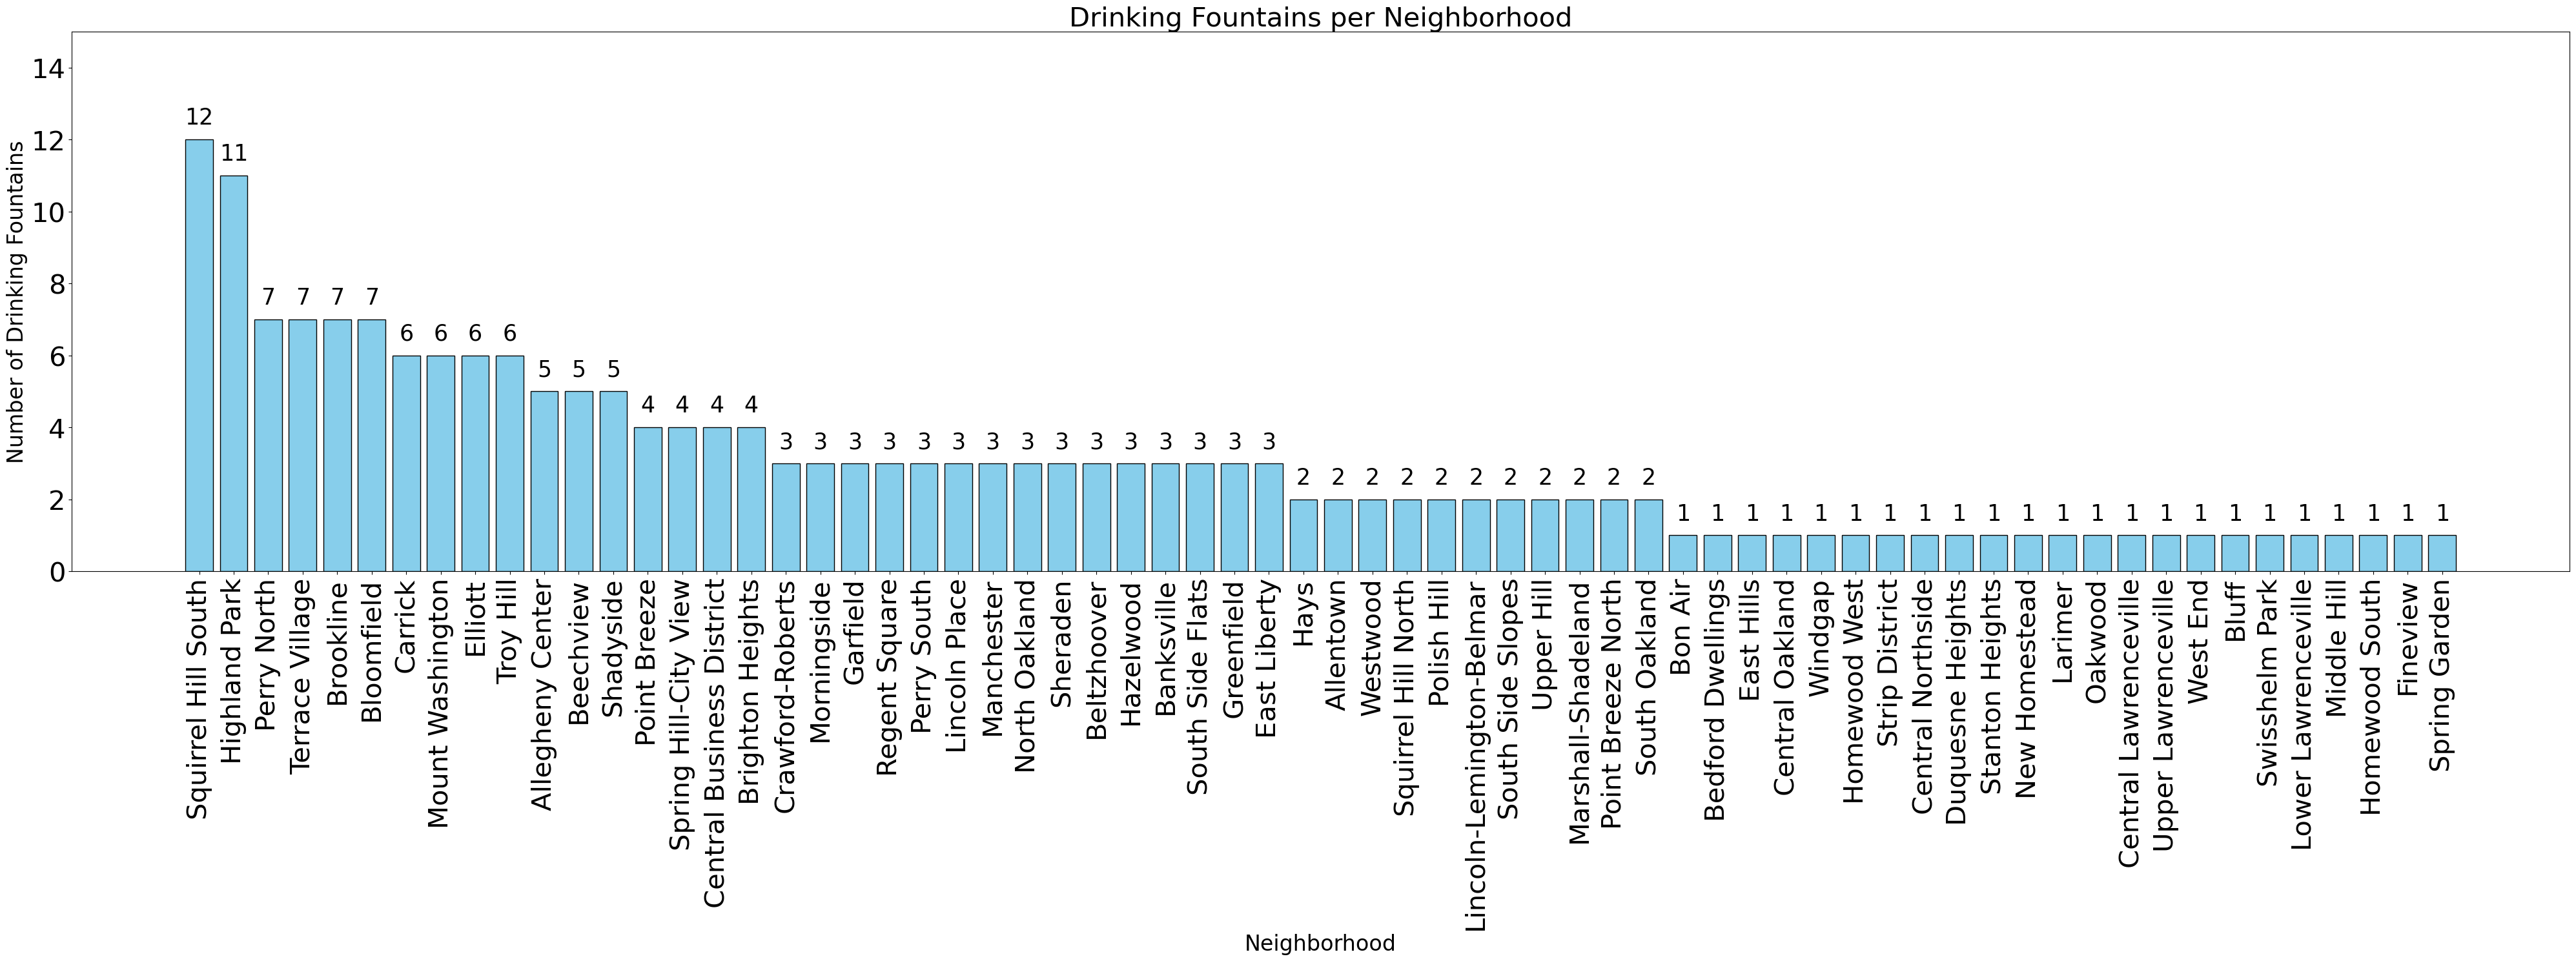

In [24]:
df2 = pd.DataFrame(list(drinking_fountain_count.items()),
                   columns=['Neighborhood', 'Number of drinking fountain'])

# Sort for easier reading
df2 = df2.sort_values(by='Number of drinking fountain', ascending=False)

# Plot (neighborhoods on x-axis, counts on y-axis)
plt.figure(figsize=(40, 15))
bars = plt.bar(df2['Neighborhood'], df2['Number of drinking fountain'], color='skyblue', edgecolor='black')
#lables 

plt.xlabel('Neighborhood', fontsize=24)
plt.ylabel('Number of Drinking Fountains', fontsize=24)
plt.title('Drinking Fountains per Neighborhood', fontsize=30)

# Rotate labels and enlarge tick labels
plt.xticks(rotation=90, fontsize=30)
plt.yticks(fontsize=30)

# inceasing the value of the y-axis:
plt.ylim(0,15)

#value lables above bars for better analysis
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.3, f'{int(height)}',
             ha='center', va='bottom', fontsize=25)
    
plt.tight_layout()
plt.show()